In [1]:
# Regular expressions
import re

# Data and visualization 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculations
import numpy as np

In [2]:
dataset = pd.read_csv("E:/CollegeMaterial/Deep learning/training.csv", 
                      encoding="latin", 
                      header=None, 
                      names=["target","id","date","query_flag","user","tweet_text"]
                     )
dataset.head(5)

,target,id,date,query_flag,user,tweet_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
negative_samples = dataset[dataset["target"]==0]              #Negative samples : (target = 0)
print(f"Number of negative samples : {len(negative_samples)}\n")
negative_samples.head(5)

Number of negative samples : 800000



,target,id,date,query_flag,user,tweet_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
positive_samples = dataset[dataset["target"]==4]               #Positive samples : (target = 0)
print(f"Number of positive samples {len(positive_samples)}\n\n")
positive_samples.head(5)

Number of positive samples 800000




,target,id,date,query_flag,user,tweet_text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [5]:
dataset.drop(["id","date","query_flag","user"],axis=1, inplace=True)   ##### drop Data
dataset.head(5)

,target,tweet_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
dataset.target = dataset.target.replace({4: 1})    # 4--->for  Positive 1---->Negative
dataset[dataset["target"]==1].head()

,target,tweet_text
800000,1,I LOVE @Health4UandPets u guys r the best!!
800001,1,im meeting up with one of my besties tonight! ...
800002,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,Being sick can be really cheap when it hurts t...
800004,1,@LovesBrooklyn2 he has that effect on everyone


In [7]:
regex_mentions = r"@[A-Za-z0-9_]+"           #Mentions
regex_links = r"https?://[A-Za-z0-9./]+"       #links
regex_special = r"[^A-Za-z0-9]+"            # charachter

In [8]:
dataset.tweet_text = dataset.tweet_text.apply(lambda x: re.sub(regex_mentions, " ", str(x).strip()))    ## Remove mentions
dataset.tweet_text = dataset.tweet_text.apply(lambda x: re.sub(regex_links, " ", str(x).strip()))     # Remove links
dataset.tweet_text = dataset.tweet_text.apply(lambda x: re.sub(regex_special, " ", str(x).strip()))    ## Remove characters

In [9]:
dataset.head(5)

,target,tweet_text
0,0,Awww that s a bummer You shoulda got David Ca...
1,0,is upset that he can t update his Facebook by ...
2,0,I dived many times for the ball Managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no it s not behaving at all i m mad why am i h...


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
train, test = train_test_split(dataset, test_size=0.2, random_state=5)      #split dataset


In [12]:
                                 ###### the text can be interpreted through analysis of the words present in the text.
                                  ### Tokenizer -> breaking apart original text into individual tokens for further analysis
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.tweet_text)
vocab_size = len(tokenizer.word_index)+1            ####result

In [13]:
print(f"Word index length: {len(tokenizer.word_index)}")           
print(f"Some words: {list(tokenizer.word_index.keys())[0:10]}")

Word index length: 249493
Some words: ['i', 'to', 'the', 'a', 'my', 'it', 'and', 'you', 'is', 'in']


In [14]:
max_length = len(dataset["tweet_text"][0].split())
for tweet in dataset["tweet_text"]: 
    length = len(tweet.split())
    if length > max_length: 
        max_length = length

print(f"Maximum token length: {max_length}")

Maximum token length: 53


In [15]:
sequences_train = tokenizer.texts_to_sequences(train.tweet_text)     ### train
sequences_test = tokenizer.texts_to_sequences(test.tweet_text)     ### test

In [16]:
X_train = pad_sequences(sequences_train, maxlen=max_length, padding="post")   # padding
X_test = pad_sequences(sequences_test, maxlen=max_length, padding="post")

y_train = train.target.values
y_test = test.target.values

print(f"Training test shape : {X_train.shape}")

Training test shape : (1280000, 53)


In [17]:
embeddings_dictionary = dict()      #Word Embeddings (GloVe)GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space

embedding_dimension = 100
glove_file = open("E:/CollegeMaterial/Deep learning/glove.txt")

In [18]:
for line in glove_file:
    records = line.split()
    word = records[0]
    representation = np.asarray(records[1:])
    embeddings_dictionary[word] = representation
    
glove_file.close()

# Initialize the embedding_matrix
embeddings_matrix = np.zeros((vocab_size, embedding_dimension))

# Iterate through the tokenizer words list
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)      # Get the word representation
    if embedding_vector is not None:      # Update the word representation 
        embeddings_matrix[index] = embedding_vector

In [19]:
embedding_layer = Embedding(
                            vocab_size, 
                            embedding_dimension, 
                            input_length=max_length, 
                            weights=[embeddings_matrix], 
                            trainable=False
)

In [20]:
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", 
    patience=10, 
    mode ="max", 
    verbose=2, 
    restore_best_weights=True
)

In [21]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Dropout(0.4))

#adding output layer 
model.add(Dense(1,activation="sigmoid"))

In [23]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 53, 100)           24949400  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 25,066,777
Trainable params: 117,377
Non-trainable params: 24,949,400
_________________________________________________________________


In [25]:
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=30,
    #erbose=1, 
    validation_data=(X_test,y_test),
    callbacks = [stop_early]
)

Epoch 1/30
40000/40000 [==============================] - 1599s 40ms/step - loss: 0.4455 - accuracy: 0.7920 - val_loss: 0.4125 - val_accuracy: 0.8139
Epoch 2/30
40000/40000 [==============================] - 1610s 40ms/step - loss: 0.3962 - accuracy: 0.8206 - val_loss: 0.3975 - val_accuracy: 0.8195
Epoch 3/30
40000/40000 [==============================] - 1630s 41ms/step - loss: 0.3806 - accuracy: 0.8290 - val_loss: 0.3933 - val_accuracy: 0.8239
Epoch 4/30
40000/40000 [==============================] - 1671s 42ms/step - loss: 0.3705 - accuracy: 0.8342 - val_loss: 0.3878 - val_accuracy: 0.8247
Epoch 5/30
40000/40000 [==============================] - 1698s 42ms/step - loss: 0.3628 - accuracy: 0.8380 - val_loss: 0.3936 - val_accuracy: 0.8196
Epoch 6/30
40000/40000 [==============================] - 1755s 44ms/step - loss: 0.3568 - accuracy: 0.8412 - val_loss: 0.3876 - val_accuracy: 0.8256
Epoch 7/30
40000/40000 [==============================] - 1860s 47ms/step - loss: 0.3514 - accuracy:

In [26]:
best_accuracy = max(history.history["val_accuracy"])
print(f"Best validation accuracy : {best_accuracy}")

Best validation accuracy : 0.8255562782287598


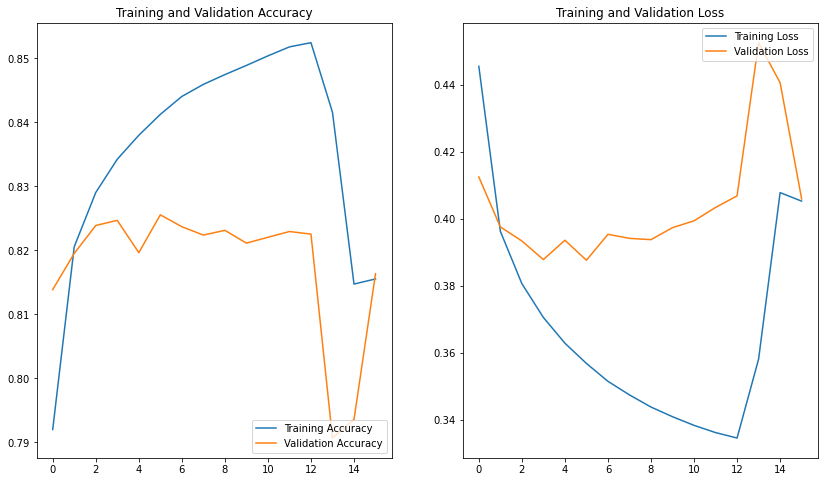

Maximum validation accuracy:  0.8255562782287598
Minimum loss: 0.387584388256073


In [27]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs_range = range(len(history.history["loss"]))
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
# Setup the legend
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

# Show the overall plot
plt.show()

position = np.argmax(history.history["val_accuracy"])
print(f"Maximum validation accuracy:  {history.history['val_accuracy'][position]}\nMinimum loss: {history.history['val_loss'][position]}")